<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Цель-проекта" data-toc-modified-id="Цель-проекта-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Цель проекта</a></span></li><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Вывод по разделу</a></span></li></ul></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Вывод по разделу</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-6.1"><span class="toc-item-num">6.1&nbsp;&nbsp;</span>Вывод по разделу</a></span></li></ul></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Вывод-по-разделу" data-toc-modified-id="Вывод-по-разделу-7.1"><span class="toc-item-num">7.1&nbsp;&nbsp;</span>Вывод по разделу</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Отток клиентов

## Описание проекта
Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

## Цель проекта
Построить модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверить *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измерять *AUC-ROC*, сравнивать её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Описание данных
<ul style="border:solid black 2px; padding: 20px">
    <b>Признаки</b>
    <li><i>RowNumber</i> — индекс строки в данных</li>
    <li><i>CustomerId</i> — уникальный идентификатор клиента</li>
    <li><i>Surname</i> — фамилия</li>
    <li><i>CreditScore</i> — кредитный рейтинг</li>
    <li><i>Geography</i> — страна проживания</li>
    <li><i>Gender</i> — пол</li>
    <li><i>Age</i> — возраст</li>
    <li><i>Tenure</i> — сколько лет человек является клиентом банка</li>
    <li><i>Balance</i> — баланс на счёте</li>
    <li><i>NumOfProducts</i> — количество продуктов банка, используемых клиентом</li>
    <li><i>HasCrCard</i> — наличие кредитной карты</li>
    <li><i>IsActiveMember</i> — активность клиента</li>
    <li><i>EstimatedSalary</i> — предполагаемая зарплата</li>
</ul>
<ul style="border:solid black 2px; padding: 20px">
    <b>Целевой признак</b>
    <li><i>Exited</i> — факт ухода клиента</li>
</ul>

## Подготовка данных

In [ ]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.utils import shuffle
from sklearn import metrics 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/datasets/Churn.csv')

In [ ]:
display(df)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5.0,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10.0,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7.0,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3.0,75075.31,2,1,0,92888.52,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


<b>Для построения моделей можно от некоторых столбцов просто навсего избавиться, а некоторые перевести в числовые.</b>

In [ ]:
df = df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1)

In [ ]:
print(df.duplicated().sum())

0


In [ ]:
df['Exited'].mean()

0.2037

<b>Около 20% клиентов ушли</b>

In [ ]:
df['Gender'].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [ ]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [ ]:
df['Age'].value_counts()

37    478
38    477
35    474
36    456
34    447
     ... 
92      2
88      1
82      1
85      1
83      1
Name: Age, Length: 70, dtype: int64

In [ ]:
df['Tenure'].value_counts()

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: Tenure, dtype: int64

In [ ]:
df['Tenure'].unique()

array([ 2.,  1.,  8.,  7.,  4.,  6.,  3., 10.,  5.,  9.,  0., nan])

<b>Избавимся от nan в столбце 'Tenure'. Заменим их на 0, возможно люди являются клиентами банка меньше года.</b>

In [ ]:
df['Tenure'] = df['Tenure'].fillna(0)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  float64
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(3), int64(6), object(2)
memory usage: 859.5+ KB


In [ ]:
df['Tenure'].value_counts()

0.0     1291
1.0      952
2.0      950
8.0      933
3.0      928
5.0      927
7.0      925
4.0      885
9.0      882
6.0      881
10.0     446
Name: Tenure, dtype: int64

<b>Так как техника One-Hot Encoding работает со всеми моделями, воспользуемся ей, чтобы перевести столбцы 'Gender' и 'Geography' в числовой вид.</b>

In [ ]:
df_ohe = pd.get_dummies(df,drop_first=True)

In [ ]:
display(df_ohe)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5.0,0.00,2,1,0,96270.64,0,0,0,1
9996,516,35,10.0,57369.61,1,1,1,101699.77,0,0,0,1
9997,709,36,7.0,0.00,1,0,1,42085.58,1,0,0,0
9998,772,42,3.0,75075.31,2,1,0,92888.52,1,1,0,1


In [ ]:
df_ohe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        10000 non-null  int64  
 1   Age                10000 non-null  int64  
 2   Tenure             10000 non-null  float64
 3   Balance            10000 non-null  float64
 4   NumOfProducts      10000 non-null  int64  
 5   HasCrCard          10000 non-null  int64  
 6   IsActiveMember     10000 non-null  int64  
 7   EstimatedSalary    10000 non-null  float64
 8   Exited             10000 non-null  int64  
 9   Geography_Germany  10000 non-null  uint8  
 10  Geography_Spain    10000 non-null  uint8  
 11  Gender_Male        10000 non-null  uint8  
dtypes: float64(3), int64(6), uint8(3)
memory usage: 732.5 KB


<b>Посмотрим зависимости между данными</b>

In [ ]:
corrMatrix = df_ohe.corr()

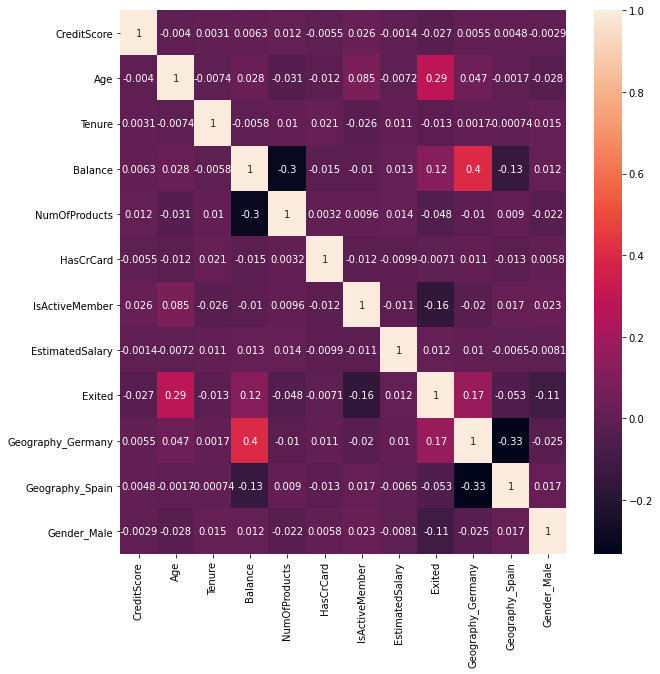

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(corrMatrix, annot=True)
plt.show()

<b>Сильных зависимостей не наблюдаем.</b>

### Вывод по разделу
Привели датасет к рабочему виду:
- Избавились от пустых значений;
- Удалили столбцы, которые не влияют на обучение наших моделей;
- Перевели некоторые столбцы в числовой вид техникой One-Hot Encoding;
- Проверили зависимости данных.

## Исследование задачи

<b>Разобьем данные на три выборки в соотношении 3:1:1. Обучающая выборка будет содержать в себе 60% данных, валидационная 20% и тестовая 20%.</b>

In [ ]:
df_ohe_train, df_ohe_valid = train_test_split(df_ohe, test_size=0.2, random_state=42)

In [ ]:
df_ohe_train, df_ohe_test = train_test_split(df_ohe_train, test_size=0.25, random_state=42)

In [ ]:
features_train = df_ohe_train.drop(['Exited'], axis=1)
target_train  = df_ohe_train['Exited']

In [ ]:
features_valid = df_ohe_valid.drop(['Exited'], axis=1)
target_valid = df_ohe_valid['Exited']

In [ ]:
features_test = df_ohe_test.drop(['Exited'], axis=1)
target_test = df_ohe_test['Exited']

<b>Убедимся, что разбили правильно.</b>

In [ ]:
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(6000, 11)
(6000,)
(2000, 11)
(2000,)
(2000, 11)
(2000,)


<b>Масштабируем признаки, чтобы модель не выделяла, что один признак важнее другого.</b>

In [ ]:
list(features_train.columns.values)

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Geography_Germany',
 'Geography_Spain',
 'Gender_Male']

In [ ]:
numeric = ['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary','Geography_Germany','Geography_Spain','Gender_Male']

In [ ]:
scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

print(features_train.shape)
print(features_valid.shape)
print(features_test.shape) 

(6000, 11)
(2000, 11)
(2000, 11)


In [ ]:
display(features_train)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8588,0.626553,-0.948125,0.810793,0.026803,-0.919788,0.654134,-1.034943,0.389943,-0.575811,1.758627,-1.087115
3178,-1.143262,0.006684,-0.159377,0.538874,0.806433,0.654134,0.966236,-1.026089,-0.575811,-0.568625,-1.087115
5200,-1.455583,0.293126,1.457573,0.283178,0.806433,0.654134,-1.034943,-1.486725,1.736682,-0.568625,0.919866
8889,-0.747657,0.006684,1.457573,0.833254,-0.919788,0.654134,-1.034943,-0.246001,-0.575811,-0.568625,-1.087115
5789,0.387107,1.534377,-1.129548,0.000856,-0.919788,0.654134,-1.034943,-1.006993,1.736682,-0.568625,-1.087115
...,...,...,...,...,...,...,...,...,...,...,...
8871,-1.934474,-0.852644,-0.482768,-1.218934,-0.919788,0.654134,-1.034943,1.634510,-0.575811,-0.568625,-1.087115
9826,1.428175,0.102165,-0.159377,-1.218934,0.806433,0.654134,-1.034943,0.648739,-0.575811,1.758627,-1.087115
5268,0.407928,-1.043606,-1.129548,-1.218934,0.806433,-1.528738,-1.034943,-0.127176,-0.575811,-0.568625,0.919866
9666,1.105444,-0.375240,0.164013,-1.218934,0.806433,0.654134,-1.034943,-0.089820,-0.575811,1.758627,0.919866


In [ ]:
display(features_valid)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6252,-0.581086,-0.661682,-0.482768,0.327195,0.806433,-1.528738,-1.034943,-1.017034,1.736682,-0.568625,0.919866
4684,-0.299998,0.388607,-1.129548,-1.218934,0.806433,0.654134,0.966236,0.805136,-0.575811,-0.568625,0.919866
1731,-0.529032,0.484088,-0.159377,-1.218934,0.806433,0.654134,-1.034943,-0.724818,-0.575811,1.758627,-1.087115
4742,-1.518047,1.916301,1.134183,0.686002,0.806433,0.654134,0.966236,1.228495,1.736682,-0.568625,0.919866
4521,-0.955870,-1.139087,0.810793,0.779430,-0.919788,0.654134,0.966236,0.252697,-0.575811,1.758627,-1.087115
...,...,...,...,...,...,...,...,...,...,...,...
6412,-0.518622,1.343416,0.164013,0.352132,-0.919788,-1.528738,0.966236,-0.960415,1.736682,-0.568625,-1.087115
8285,-0.445747,-1.330048,1.780963,-1.218934,-0.919788,-1.528738,0.966236,0.169514,-0.575811,-0.568625,0.919866
7853,0.813945,0.770530,0.810793,-1.218934,-0.919788,0.654134,-1.034943,-1.163641,-0.575811,-0.568625,-1.087115
1095,0.418339,-0.948125,-0.159377,-1.218934,-0.919788,0.654134,-1.034943,-0.407833,-0.575811,-0.568625,0.919866


In [ ]:
display(features_test)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
3188,1.553103,-0.661682,-0.159377,-0.017150,-0.919788,0.654134,0.966236,-1.084803,-0.575811,-0.568625,-1.087115
8293,1.188729,-1.043606,-0.159377,0.231074,-0.919788,-1.528738,0.966236,-1.368802,1.736682,-0.568625,-1.087115
1710,1.834191,-1.043606,1.134183,0.935642,-0.919788,0.654134,-1.034943,-0.362538,-0.575811,1.758627,0.919866
7510,1.521871,-0.279759,-1.129548,-1.218934,0.806433,0.654134,0.966236,1.025781,-0.575811,-0.568625,0.919866
1461,-0.424926,-0.470721,-0.159377,-1.218934,0.806433,0.654134,-1.034943,1.233214,-0.575811,1.758627,0.919866
...,...,...,...,...,...,...,...,...,...,...,...
2834,2.063226,-0.852644,-1.452938,0.724101,-0.919788,-1.528738,-1.034943,-1.042730,-0.575811,-0.568625,0.919866
449,1.313657,0.770530,0.487403,0.816255,0.806433,0.654134,-1.034943,0.427355,-0.575811,1.758627,-1.087115
6686,-0.320819,1.056973,-0.482768,1.388389,-0.919788,-1.528738,0.966236,0.538042,-0.575811,1.758627,0.919866
3561,0.491214,-0.757163,-1.452938,0.792890,0.806433,0.654134,-1.034943,1.554510,1.736682,-0.568625,-1.087115


<b>Исследуем баланс классов</b>

0    0.7963
1    0.2037
Name: Exited, dtype: float64


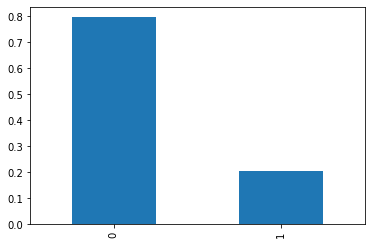

In [ ]:
class_frequency = df_ohe['Exited'].value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar') 

<b>Провекра на константной модели</b>

In [ ]:
target = df_ohe['Exited']
features = df_ohe.drop('Exited', axis=1)

target_pred_constant = pd.Series(0, index=target.index)
print(accuracy_score(target, target_pred_constant)) 

0.7963


<b>Классы несбалансированны</b>

<b>Исследуем модели на несбалансированных классах</b>

<b>Модель дерево решений</b>

<b>Осуществим поиск параметров методом GridSearch</b>

In [ ]:
# splitter = ['best','random']
# max_depth = [4,5,6,7,8,9,10,15]
# min_samples_split = [2,3,4,5,6,7,8,9]
# min_samples_leaf = [2,3,4,5,6,7,8,9]
# param_grid = {'splitter': splitter,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf}
# gs_tree = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid)
# gs_tree.fit(features_train,target_train)
# gs_tree.best_params_

In [ ]:
model_tree = DecisionTreeClassifier(random_state=42, max_depth=6, min_samples_leaf=6,min_samples_split=2,splitter='best')
model_tree.fit(features_train, target_train) 
predictions_valid_tree = model_tree.predict(features_valid)

accuracy = accuracy_score(target_valid,predictions_valid_tree)
precision = precision_score(target_valid,predictions_valid_tree)
recall = recall_score(target_valid,predictions_valid_tree)
f1 = f1_score(target_valid,predictions_valid_tree)

print("accuracy:", accuracy)
print("precision:", precision)
print("recall:", recall)
print("f1:", f1)
print()
print(metrics.classification_report(target_valid,predictions_valid_tree))

accuracy: 0.8655
precision: 0.8131313131313131
recall: 0.40966921119592875
f1: 0.5448392554991539

              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1607
           1       0.81      0.41      0.54       393

    accuracy                           0.87      2000
   macro avg       0.84      0.69      0.73      2000
weighted avg       0.86      0.87      0.85      2000



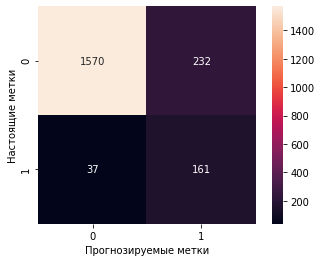

In [ ]:
mat_tree = confusion_matrix(target_valid,predictions_valid_tree)
sns.heatmap(mat_tree.T, square=True, annot=True, fmt='d', cbar=True)
plt.ylabel('Настоящие метки')
plt.xlabel('Прогнозируемые метки')
plt.show()

<b>Модель случайный лес</b>

In [ ]:
# n_estimators = [15,50,60,70]
# max_depth = [9,12,15]
# min_samples_split = [2,4,6,8]
# min_samples_leaf = [1,3,5,7,9]
# param_grid = {'n_estimators': n_estimators,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf}
# gs = GridSearchCV(RandomForestClassifier(random_state=42), param_grid)
# gs.fit(features_train,target_train)
# gs.best_params_

In [ ]:
model_forest = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=12,min_samples_leaf=1,min_samples_split=6) 
model_forest.fit(features_train,target_train)
predictions_valid_forest = model_forest.predict(features_valid)

print(metrics.classification_report(target_valid,predictions_valid_forest))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.46      0.57       393

    accuracy                           0.86      2000
   macro avg       0.82      0.71      0.74      2000
weighted avg       0.86      0.86      0.85      2000



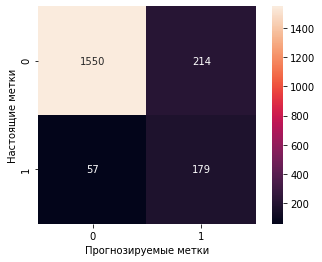

In [ ]:
mat_forest = confusion_matrix(target_valid,predictions_valid_forest)
sns.heatmap(mat_forest.T, square=True, annot=True, fmt='d', cbar=True)
plt.ylabel('Настоящие метки')
plt.xlabel('Прогнозируемые метки')
plt.show()

<b>Модель логистическая регрессия</b>

In [ ]:
# penalty = ['l1','l2']
# C = [1,2,3,4,5,6,7,8,9]
# max_iter = [10,20,30,50,70,80,100]
# param_grid = {'penalty': penalty,
#                'C': C,
#                'max_iter': max_iter}
# gs_reg = GridSearchCV(LogisticRegression(random_state=42), param_grid)
# gs_reg.fit(features_train,target_train)
# gs_reg.best_params_

In [ ]:
model_reg = LogisticRegression(C=2,random_state=42, penalty='l2',max_iter=10) 
model_reg.fit(features_train,target_train)
predictions_valid_reg = model_reg.predict(features_valid)

print(metrics.classification_report(target_valid,predictions_valid_reg))

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.77      0.81      0.77      2000



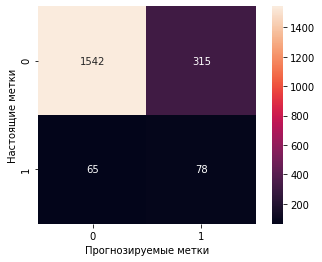

In [ ]:
mat_reg = confusion_matrix(target_valid,predictions_valid_reg)
sns.heatmap(mat_reg.T, square=True, annot=True, fmt='d', cbar=True)
plt.ylabel('Настоящие метки')
plt.xlabel('Прогнозируемые метки')
plt.show()

<b>Проверим модели на тестовой выборке</b>

In [ ]:
new_features = pd.concat([features_train, features_valid])
new_target = pd.concat([target_train, target_valid])

In [ ]:
display(new_features)

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
8588,0.626553,-0.948125,0.810793,0.026803,-0.919788,0.654134,-1.034943,0.389943,-0.575811,1.758627,-1.087115
3178,-1.143262,0.006684,-0.159377,0.538874,0.806433,0.654134,0.966236,-1.026089,-0.575811,-0.568625,-1.087115
5200,-1.455583,0.293126,1.457573,0.283178,0.806433,0.654134,-1.034943,-1.486725,1.736682,-0.568625,0.919866
8889,-0.747657,0.006684,1.457573,0.833254,-0.919788,0.654134,-1.034943,-0.246001,-0.575811,-0.568625,-1.087115
5789,0.387107,1.534377,-1.129548,0.000856,-0.919788,0.654134,-1.034943,-1.006993,1.736682,-0.568625,-1.087115
...,...,...,...,...,...,...,...,...,...,...,...
6412,-0.518622,1.343416,0.164013,0.352132,-0.919788,-1.528738,0.966236,-0.960415,1.736682,-0.568625,-1.087115
8285,-0.445747,-1.330048,1.780963,-1.218934,-0.919788,-1.528738,0.966236,0.169514,-0.575811,-0.568625,0.919866
7853,0.813945,0.770530,0.810793,-1.218934,-0.919788,0.654134,-1.034943,-1.163641,-0.575811,-0.568625,-1.087115
1095,0.418339,-0.948125,-0.159377,-1.218934,-0.919788,0.654134,-1.034943,-0.407833,-0.575811,-0.568625,0.919866


In [ ]:
display(new_target)

8588    0
3178    0
5200    0
8889    0
5789    1
       ..
6412    1
8285    0
7853    1
1095    1
6929    1
Name: Exited, Length: 8000, dtype: int64

In [ ]:
model_tree.fit(new_features, new_target) 
test_predictions_tree = model_tree.predict(features_test)

print(metrics.classification_report(target_test,test_predictions_tree))

              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1587
           1       0.78      0.43      0.56       413

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.84      2000



In [ ]:
model_forest.fit(new_features, new_target) 
test_predictions_forest = model_forest.predict(features_test)

print(metrics.classification_report(target_test,test_predictions_forest))

              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1587
           1       0.82      0.47      0.60       413

    accuracy                           0.87      2000
   macro avg       0.85      0.72      0.76      2000
weighted avg       0.87      0.87      0.86      2000



In [ ]:
model_reg.fit(new_features, new_target) 
test_predictions_reg = model_reg.predict(features_test)

print(metrics.classification_report(target_test,test_predictions_reg))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89      1587
           1       0.62      0.21      0.32       413

    accuracy                           0.81      2000
   macro avg       0.72      0.59      0.60      2000
weighted avg       0.78      0.81      0.77      2000



<b>Измерим AUC_ROC</b>

In [ ]:
probabilities_test_tree = model_tree.predict_proba(features_test)
probabilities_one_test_tree = probabilities_test_tree[:, 1]

auc_roc_tree = roc_auc_score(target_test, probabilities_one_test_tree)

print(auc_roc_tree)

0.8404729101919197


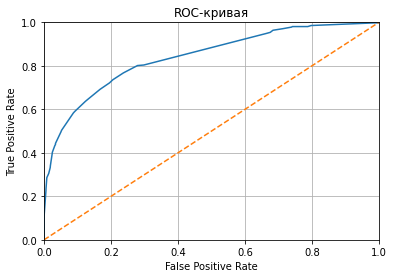

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test_tree)

plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.grid()

# установим границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

In [ ]:
probabilities_test_forest = model_forest.predict_proba(features_test)
probabilities_one_test_forest = probabilities_test_forest[:, 1]

auc_roc_forest = roc_auc_score(target_test, probabilities_one_test_forest)

print(auc_roc_forest)

0.8647653223604008


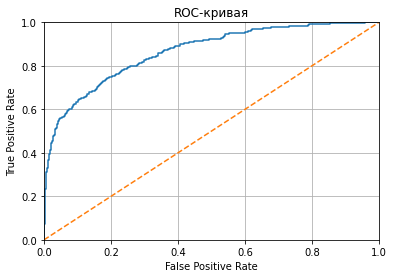

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test_forest)

plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.grid()

# установим границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

In [ ]:
probabilities_test_reg = model_reg.predict_proba(features_test)
probabilities_one_test_reg = probabilities_test_reg[:, 1]

auc_roc_reg = roc_auc_score(target_test, probabilities_one_test_reg)

print(auc_roc_reg)

0.7839894664732064


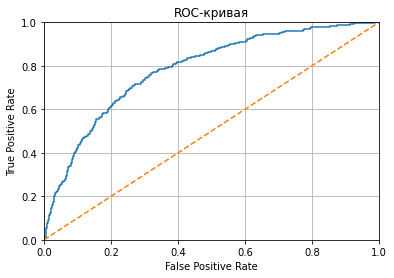

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test_reg)

plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.grid()

# установим границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

### Вывод по разделу
1. Построили 3 модели: дерево решений, случайный лес, логистическая регрессия.
2. Для каждой модели расчитали метрики качества и построили ROC-кривые.
3. Судя по расчитанным метрикам можно сделать вывод, что <b><i>модель случайный лес</i></b> получилась наиболее оптимальной, но необходимо рассмотреть модели на сбалансированных классах.
<br>
<table border="5" width="50%" cellpadding="7" cellspasing="5" bordercolor="#000000" align="left">
    <tr>
        <th>Модель</th>
        <th>Accuracy</th>
        <th>Precision</th>
        <th>Recall</th>
        <th>F1</th>
        <th>AUC_ROC</th>
    </tr>
    <tr>
        <th>Дерево решений</th>
        <th>0.86</th>
        <th>0.78</th>
        <th>0.43</th>
        <th>0.56</th>
        <th>0.84</th>
    </tr>
     <tr>
        <th>Случайный лес</th>
        <th>0.87</th>
        <th>0.82</th>
        <th>0.47</th>
        <th>0.60</th>
        <th>0.86</th>
    </tr>
    <tr>
        <th>Логистическая регрессия</th>
        <th>0.81</th>
        <th>0.62</th>
        <th>0.21</th>
        <th>0.32</th>
        <th>0.78</th>
    </tr>
</table>


## Борьба с дисбалансом

<b>Обучим модели со взвешиванием классов</b>

<b>Модель дерево решений</b>

In [ ]:
model_tree = DecisionTreeClassifier(random_state=42, class_weight='balanced', max_depth=6, min_samples_leaf=6,min_samples_split=2,splitter='best')
model_tree.fit(features_train, target_train) 
predictions_valid_tree = model_tree.predict(features_valid)

print(metrics.classification_report(target_valid,predictions_valid_tree))

              precision    recall  f1-score   support

           0       0.94      0.77      0.85      1607
           1       0.46      0.78      0.58       393

    accuracy                           0.78      2000
   macro avg       0.70      0.78      0.71      2000
weighted avg       0.84      0.78      0.79      2000



<b>Проверка на тестовой выборке</b>

In [ ]:
model_tree.fit(new_features, new_target) 
test_predictions_tree = model_tree.predict(features_test)

print(metrics.classification_report(target_test,test_predictions_tree))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1587
           1       0.45      0.78      0.57       413

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.83      0.76      0.78      2000



In [ ]:
probabilities_test_tree = model_tree.predict_proba(features_test)
probabilities_one_test_tree = probabilities_test_tree[:, 1]

auc_roc_tree = roc_auc_score(target_test, probabilities_one_test_tree)

print(auc_roc_tree)

0.842864466282492


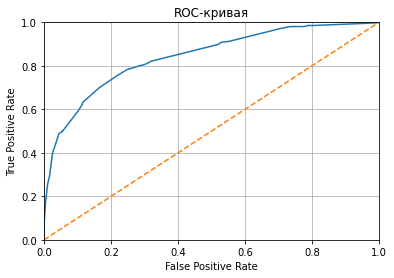

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test_tree)

plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.grid()

# установим границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

<b>Модель случайный лес</b>

In [ ]:
model_forest = RandomForestClassifier(random_state=42, class_weight='balanced', n_estimators=50, max_depth=12,min_samples_leaf=1,min_samples_split=6) 
model_forest.fit(features_train,target_train)
predictions_valid_forest = model_forest.predict(features_valid)

print(metrics.classification_report(target_valid,predictions_valid_forest))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1607
           1       0.63      0.61      0.62       393

    accuracy                           0.85      2000
   macro avg       0.77      0.76      0.76      2000
weighted avg       0.85      0.85      0.85      2000



<b>Проверка на тестовой выборке</b>

In [ ]:
model_forest.fit(new_features, new_target) 
test_predictions_forest = model_forest.predict(features_test)

print(metrics.classification_report(target_test,test_predictions_forest))

              precision    recall  f1-score   support

           0       0.90      0.91      0.91      1587
           1       0.65      0.62      0.63       413

    accuracy                           0.85      2000
   macro avg       0.77      0.77      0.77      2000
weighted avg       0.85      0.85      0.85      2000



In [ ]:
probabilities_test_forest = model_forest.predict_proba(features_test)
probabilities_one_test_forest = probabilities_test_forest[:, 1]

auc_roc_forest = roc_auc_score(target_test, probabilities_one_test_forest)

print(auc_roc_forest)

0.8697803430109348


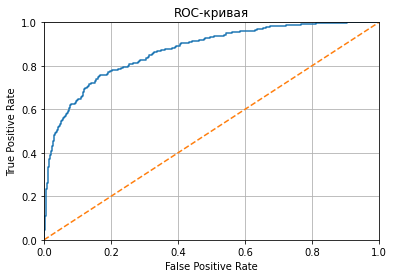

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test_forest)

plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.grid()

# установим границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

<b>Модель логистическая регрессия</b>

In [ ]:
model_reg = LogisticRegression(C=2,random_state=42, class_weight='balanced', penalty='l2',max_iter=10) 
model_reg.fit(features_train,target_train)
predictions_valid_reg = model_reg.predict(features_valid)

print(metrics.classification_report(target_valid,predictions_valid_reg))

              precision    recall  f1-score   support

           0       0.91      0.72      0.81      1607
           1       0.39      0.72      0.51       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.66      2000
weighted avg       0.81      0.72      0.75      2000



<b>Проверка на тестовой выборке</b>

In [ ]:
model_reg.fit(new_features, new_target) 
test_predictions_reg = model_reg.predict(features_test)

print(metrics.classification_report(target_test,test_predictions_reg))

              precision    recall  f1-score   support

           0       0.91      0.73      0.81      1587
           1       0.41      0.72      0.52       413

    accuracy                           0.73      2000
   macro avg       0.66      0.72      0.66      2000
weighted avg       0.81      0.72      0.75      2000



In [ ]:
probabilities_test_reg = model_reg.predict_proba(features_test)
probabilities_one_test_reg = probabilities_test_reg[:, 1]

auc_roc_reg = roc_auc_score(target_test, probabilities_one_test_reg)

print(auc_roc_reg)

0.785554848641581


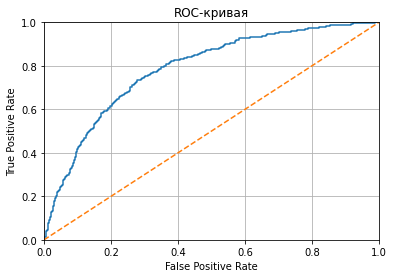

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test_reg)

plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.grid()

# установим границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

<b>Сбалансируем классы путем увеличения числа объектов меньшего класса</b>

In [ ]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=42)
    return features_upsampled, target_upsampled

In [ ]:
features_upsampled, target_upsampled = upsample(features_train,target_train,4)

In [ ]:
print(features_upsampled.shape)
print(target_upsampled.shape)

(9693, 11)
(9693,)


<b>Модель дерево решений</b>

In [ ]:
model_tree = DecisionTreeClassifier(random_state=42, max_depth=6, min_samples_leaf=6,min_samples_split=2,splitter='best')
model_tree.fit(features_upsampled, target_upsampled) 
predictions_valid_tree = model_tree.predict(features_valid)

print(metrics.classification_report(target_valid,predictions_valid_tree))

              precision    recall  f1-score   support

           0       0.93      0.78      0.85      1607
           1       0.46      0.78      0.58       393

    accuracy                           0.78      2000
   macro avg       0.70      0.78      0.71      2000
weighted avg       0.84      0.78      0.80      2000



<b>Модель случайный лес</b>

In [ ]:
model_forest = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=12,min_samples_leaf=1,min_samples_split=6)
model_forest.fit(features_upsampled, target_upsampled)
predictions_valid_forest = model_forest.predict(features_valid)

print(metrics.classification_report(target_valid,predictions_valid_forest))

              precision    recall  f1-score   support

           0       0.92      0.87      0.89      1607
           1       0.56      0.67      0.61       393

    accuracy                           0.83      2000
   macro avg       0.74      0.77      0.75      2000
weighted avg       0.85      0.83      0.84      2000



<b>Модель логистическая регрессия</b>

In [ ]:
model_reg = LogisticRegression(C=2,random_state=42, penalty='l2',max_iter=10) 
model_reg.fit(features_upsampled, target_upsampled)
predictions_valid_reg = model_reg.predict(features_valid)

print(metrics.classification_report(target_valid,predictions_valid_reg))

              precision    recall  f1-score   support

           0       0.92      0.71      0.80      1607
           1       0.38      0.73      0.50       393

    accuracy                           0.72      2000
   macro avg       0.65      0.72      0.65      2000
weighted avg       0.81      0.72      0.74      2000



<b>Сбалансируем классы путем уменьшения числа объектов большего класса</b>

In [ ]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    features_downsampled = pd.concat([features_zeros.sample(frac=fraction, random_state=42)] + [features_ones])
    target_downsampled = pd.concat([target_zeros.sample(frac=fraction, random_state=42)] + [target_ones])
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=42)
    return features_downsampled, target_downsampled

In [ ]:
features_downsampled, target_downsampled = downsample(features_train,target_train,0.4)

In [ ]:
print(features_downsampled.shape)
print(target_downsampled.shape)

(3139, 11)
(3139,)


<b>Модель дерево решений</b>

In [ ]:
model_tree = DecisionTreeClassifier(random_state=42, max_depth=6, min_samples_leaf=6,min_samples_split=2,splitter='best')
model_tree.fit(features_downsampled, target_downsampled) 
predictions_valid_tree = model_tree.predict(features_valid)

print(metrics.classification_report(target_valid,predictions_valid_tree))

              precision    recall  f1-score   support

           0       0.92      0.82      0.86      1607
           1       0.48      0.69      0.57       393

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.81      2000



<b>Модель случайный лес</b>

In [ ]:
model_forest = RandomForestClassifier(random_state=42, n_estimators=50, max_depth=12,min_samples_leaf=1,min_samples_split=6)
model_forest.fit(features_downsampled, target_downsampled)
predictions_valid_forest = model_forest.predict(features_valid)

print(metrics.classification_report(target_valid,predictions_valid_forest))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90      1607
           1       0.58      0.68      0.62       393

    accuracy                           0.84      2000
   macro avg       0.75      0.78      0.76      2000
weighted avg       0.85      0.84      0.84      2000



<b>Модель логистическая регрессия</b>

In [ ]:
model_reg = LogisticRegression(C=2,random_state=42, penalty='l2',max_iter=10) 
model_reg.fit(features_downsampled, target_downsampled)
predictions_valid_reg = model_reg.predict(features_valid)

print(metrics.classification_report(target_valid,predictions_valid_reg))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86      1607
           1       0.46      0.55      0.50       393

    accuracy                           0.79      2000
   macro avg       0.67      0.70      0.68      2000
weighted avg       0.80      0.79      0.79      2000



### Вывод по разделу
1. Провели три исследования, учитывая дисбаланс классов.
2. Качество каждой модели улучшили, если опираться на показатель F1-меру. Проведем исследование на тестовых выборках.

## Тестирование модели

<b>Сбалансируем классы путем увеличения числа объектов меньшего класса</b>

In [ ]:
features_upsampled_n, target_upsampled_n = upsample(new_features,new_target,3)

<b>Модель дерево решений</b>

In [ ]:
model_tree.fit(features_upsampled_n, target_upsampled_n) 
test_predictions_tree = model_tree.predict(features_test)

print(metrics.classification_report(target_test,test_predictions_tree))

              precision    recall  f1-score   support

           0       0.93      0.75      0.83      1587
           1       0.45      0.78      0.57       413

    accuracy                           0.76      2000
   macro avg       0.69      0.77      0.70      2000
weighted avg       0.83      0.76      0.78      2000



In [ ]:
probabilities_test_tree = model_tree.predict_proba(features_test)
probabilities_one_test_tree = probabilities_test_tree[:, 1]

auc_roc_tree = roc_auc_score(target_test, probabilities_one_test_tree)

print(auc_roc_tree)

0.8382888511529054


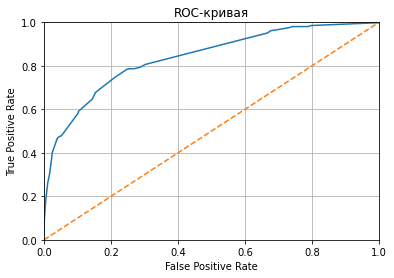

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test_tree)

plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.grid()

# установим границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

<b>Модель случайный лес</b>

In [ ]:
model_forest.fit(features_upsampled_n, target_upsampled_n)
test_predictions_forest = model_forest.predict(features_test)

print(metrics.classification_report(target_test,test_predictions_forest))

              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1587
           1       0.63      0.65      0.64       413

    accuracy                           0.85      2000
   macro avg       0.77      0.78      0.77      2000
weighted avg       0.85      0.85      0.85      2000



In [ ]:
probabilities_test_forest = model_forest.predict_proba(features_test)
probabilities_one_test_forest = probabilities_test_forest[:, 1]

auc_roc_forest = roc_auc_score(target_test, probabilities_one_test_forest)

print(auc_roc_forest)

0.8706866168978885


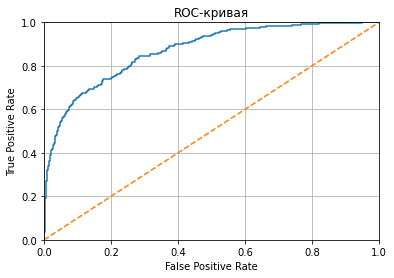

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test_forest)

plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.grid()

# установим границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

<b>Модель логистическая регрессия</b>

In [ ]:
model_reg.fit(features_upsampled_n, target_upsampled_n)
test_predictions_reg = model_reg.predict(features_test)

print(metrics.classification_report(target_test,test_predictions_reg))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85      1587
           1       0.45      0.61      0.52       413

    accuracy                           0.77      2000
   macro avg       0.67      0.71      0.68      2000
weighted avg       0.80      0.77      0.78      2000



In [ ]:
probabilities_test_reg = model_reg.predict_proba(features_test)
probabilities_one_test_reg = probabilities_test_reg[:, 1]

auc_roc_reg = roc_auc_score(target_test, probabilities_one_test_reg)

print(auc_roc_reg)

0.7854831401017042


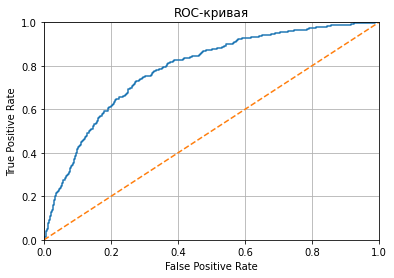

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test_reg)

plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.grid()

# установим границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

<b>Сбалансируем классы путем уменьшения числа объектов большего класса</b>

In [ ]:
features_downsampled_n, target_downsampled_n = downsample(new_features,new_target,0.3)

<b>Модель дерево решений</b>

In [ ]:
model_tree.fit(features_downsampled_n, target_downsampled_n) 
test_predictions_tree = model_tree.predict(features_test)

print(metrics.classification_report(target_test,test_predictions_tree))

              precision    recall  f1-score   support

           0       0.92      0.81      0.86      1587
           1       0.49      0.71      0.58       413

    accuracy                           0.79      2000
   macro avg       0.70      0.76      0.72      2000
weighted avg       0.83      0.79      0.80      2000



In [ ]:
probabilities_test_tree = model_tree.predict_proba(features_test)
probabilities_one_test_tree = probabilities_test_tree[:, 1]

auc_roc_tree = roc_auc_score(target_test, probabilities_one_test_tree)

print(auc_roc_tree)

0.8400945332155483


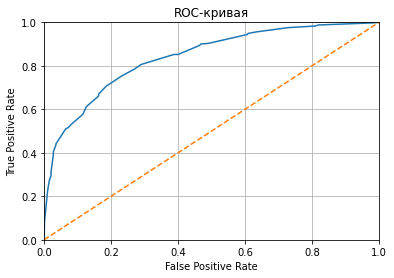

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test_tree)

plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.grid()

# установим границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

<b>Модель случайный лес</b>

In [ ]:
model_forest.fit(features_downsampled_n, target_downsampled_n)
test_predictions_forest = model_forest.predict(features_test)

print(metrics.classification_report(target_test,test_predictions_forest))

              precision    recall  f1-score   support

           0       0.92      0.83      0.87      1587
           1       0.53      0.72      0.61       413

    accuracy                           0.81      2000
   macro avg       0.72      0.78      0.74      2000
weighted avg       0.84      0.81      0.82      2000



In [ ]:
probabilities_test_forest = model_forest.predict_proba(features_test)
probabilities_one_test_forest = probabilities_test_forest[:, 1]

auc_roc_forest = roc_auc_score(target_test, probabilities_one_test_forest)

print(auc_roc_forest)

0.8664832758902158


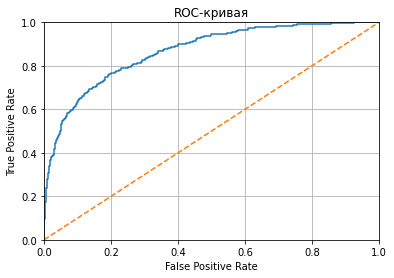

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test_forest)

plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.grid()

# установим границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

<b>Модель логистическая регрессия</b>

In [ ]:
model_reg.fit(features_downsampled_n, target_downsampled_n)
test_predictions_reg = model_reg.predict(features_test)

print(metrics.classification_report(target_test,test_predictions_reg))

              precision    recall  f1-score   support

           0       0.89      0.78      0.83      1587
           1       0.43      0.65      0.52       413

    accuracy                           0.75      2000
   macro avg       0.66      0.71      0.68      2000
weighted avg       0.80      0.75      0.77      2000



In [ ]:
probabilities_test_reg = model_reg.predict_proba(features_test)
probabilities_one_test_reg = probabilities_test_reg[:, 1]

auc_roc_reg = roc_auc_score(target_test, probabilities_one_test_reg)

print(auc_roc_reg)

0.7845875462100511


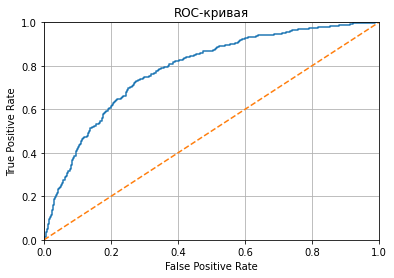

In [ ]:
fpr, tpr, thresholds = roc_curve(target_test, probabilities_one_test_reg)

plt.figure()

plt.plot(fpr, tpr)
# ROC-кривая случайной модели (выглядит как прямая)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.grid()

# установим границы осей от 0 до 1 >
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.title('ROC-кривая')
plt.show()

### Вывод по разделу
1. Рузультаты метрик касчеств моделей после взвешивания классов.
<br>
<table border="5" width="50%" cellpadding="7" cellspasing="5" bordercolor="#000000" align="left">
    <tr>
        <th>Модель</th>
        <th>Accuracy</th>
        <th>Precision</th>
        <th>Recall</th>
        <th>F1</th>
        <th>AUC_ROC</th>
    </tr>
    <tr>
        <th>Дерево решений</th>
        <th>0.76</th>
        <th>0.45</th>
        <th>0.78</th>
        <th>0.57</th>
        <th>0.84</th>
    </tr>
     <tr>
        <th>Случайный лес</th>
        <th>0.85</th>
        <th>0.63</th>
        <th>0.65</th>
        <th>0.64</th>
        <th>0.87</th>
    </tr>
    <tr>
        <th>Логистическая регрессия</th>
        <th>0.77</th>
        <th>0.45</th>
        <th>0.61</th>
        <th>0.52</th>
        <th>0.79</th>
    </tr>
</table>

2. Рузультаты метрик качеств моделей после сбалансирования классов, путем увеличения числа объектов меньшего класса.
<br>
<table border="5" width="50%" cellpadding="7" cellspasing="5" bordercolor="#000000" align="left">
    <tr>
        <th>Модель</th>
        <th>Accuracy</th>
        <th>Precision</th>
        <th>Recall</th>
        <th>F1</th>
        <th>AUC_ROC</th>
    </tr>
    <tr>
        <th>Дерево решений</th>
        <th>0.76</th>
        <th>0.45</th>
        <th>0.78</th>
        <th>0.57</th>
        <th>0.84</th>
    </tr>
     <tr>
        <th>Случайный лес</th>
        <th>0.84</th>
        <th>0.61</th>
        <th>0.65</th>
        <th>0.63</th>
        <th>0.86</th>
    </tr>
    <tr>
        <th>Логистическая регрессия</th>
        <th>0.77</th>
        <th>0.45</th>
        <th>0.61</th>
        <th>0.52</th>
        <th>0.79</th>
    </tr>
</table>

3. Рузультаты метрик качеств моделей после сбалансирования классов, путем уменьшения числа объектов большего класса.
<br>
<table border="5" width="50%" cellpadding="7" cellspasing="5" bordercolor="#000000" align="left">
    <tr>
        <th>Модель</th>
        <th>Accuracy</th>
        <th>Precision</th>
        <th>Recall</th>
        <th>F1</th>
        <th>AUC_ROC</th>
    </tr>
    <tr>
        <th>Дерево решений</th>
        <th>0.79</th>
        <th>0.49</th>
        <th>0.71</th>
        <th>0.58</th>
        <th>0.84</th>
    </tr>
     <tr>
        <th>Случайный лес</th>
        <th>0.81</th>
        <th>0.53</th>
        <th>0.72</th>
        <th>0.61</th>
        <th>0.87</th>
    </tr>
    <tr>
        <th>Логистическая регрессия</th>
        <th>0.75</th>
        <th>0.43</th>
        <th>0.65</th>
        <th>0.52</th>
        <th>0.78</th>
    </tr>
</table>

<b>Изходя из полученных результатов модель Случайный лес наиболее оптимальная для использования.</b>

## Чек-лист готовности проекта

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: задача исследована
    - [x]  Исследован баланс классов
    - [x]  Изучены модели без учёта дисбаланса
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 3: учтён дисбаланс
    - [x]  Применено несколько способов борьбы с дисбалансом
    - [x]  Написаны выводы по результатам исследования
- [x]  Выполнен шаг 4: проведено тестирование
- [x]  Удалось достичь *F1*-меры не менее 0.59
- [x]  Исследована метрика *AUC-ROC*